<a href="https://colab.research.google.com/github/tvinaymanikumar/Image-Classification/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [ ]:
(xtrain,ytrain),(xtest,ytest)=datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
xtest.shape

(10000, 32, 32, 3)

In [ ]:
xtrain.shape

(50000, 32, 32, 3)

In [ ]:
ytrain.shape

(50000, 1)

In [ ]:
ytrain[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
ytrain=ytrain.reshape(-1,)
ytrain[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
ytest=ytest.reshape(-1,)
ytest[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [ ]:
classname=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def example(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classname[y[index]])

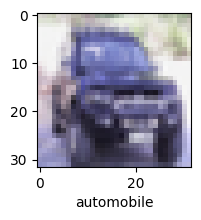

In [ ]:
example(xtest,ytest,9)

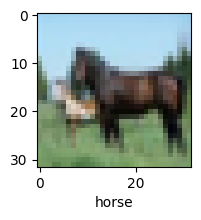

In [ ]:
example(xtrain,ytrain,12)

In [ ]:
xtrain=xtrain/255
xtest=xtest/255

In [ ]:
# ANN model
model = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
model.fit(xtrain, ytrain, epochs=10, validation_data=(xtest, ytest))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 350s 223ms/step - accuracy: 0.2742 - loss: 2.1923 - val_accuracy: 0.3938 - val_loss: 1.7096
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 379s 222ms/step - accuracy: 0.4007 - loss: 1.6735 - val_accuracy: 0.4191 - val_loss: 1.6131
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 379s 220ms/step - accuracy: 0.4291 - loss: 1.5932 - val_accuracy: 0.4173 - val_loss: 1.6313
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 334s 214ms/step - accuracy: 0.4459 - loss: 1.5370 - val_accuracy: 0.4416 - val_loss: 1.5620
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 314s 201ms/step - accuracy: 0.4622 - loss: 1.5038 - val_accuracy: 0.4292 - val_loss: 1.5707
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 327s 204ms/step - accuracy: 0.4745 - loss: 1.4654 - val_accuracy: 0.4734 - val_loss: 1.4780
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 335s 214ms/step - accuracy: 0.4844 - loss: 1.4355 - val_accuracy: 0.4730 - val_loss: 1.4802
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 361s 201ms/step - ac

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(xtest)
y_pred_classes = [np.argmax(element) for element in y_pred]
print('classification report: \n', classification_report(ytest, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.58      0.46      0.51      1000
           1       0.60      0.60      0.60      1000
           2       0.29      0.52      0.37      1000
           3       0.33      0.34      0.34      1000
           4       0.52      0.20      0.29      1000
           5       0.45      0.30      0.36      1000
           6       0.37      0.70      0.49      1000
           7       0.62      0.42      0.50      1000
           8       0.63      0.60      0.61      1000
           9       0.59      0.45      0.51      1000

    accuracy                           0.46     10000
   macro avg       0.50      0.46      0.46     10000
weighted avg       0.50      0.46      0.46     10000



In [ ]:
# CNN model as ANN model has less accuracy
cnn = models. Sequential ([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters = 64, kernel_size=(3, 3), activation="relu"),
    layers. MaxPooling2D((2, 2)),
    layers. Flatten(),
    layers. Dense(64, activation='relu'),
    layers. Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
history=cnn.fit(xtrain, ytrain, epochs=10, validation_data=(xtest, ytest))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 46ms/step - accuracy: 0.8264 - loss: 0.5039 - val_accuracy: 0.7074 - val_loss: 0.9456
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.8384 - loss: 0.4700 - val_accuracy: 0.6969 - val_loss: 1.0137
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.8514 - loss: 0.4332 - val_accuracy: 0.6923 - val_loss: 1.0310
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 43ms/step - accuracy: 0.8602 - loss: 0.4020 - val_accuracy: 0.6795 - val_loss: 1.1087
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 44ms/step - accuracy: 0.8692 - loss: 0.3693 - val_accuracy: 0.6948 - val_loss: 1.1094
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 43ms/step - accuracy: 0.8834 - loss: 0.3335 - val_accuracy: 0.6859 - val_loss: 1.2134
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 45ms/step - accuracy: 0.8906 - loss: 0.3135 - val_accuracy: 0.6990 - val_loss: 1.2330
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 45ms/step - accuracy: 0.9045 -

In [ ]:
cnn.evaluate(xtest,ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6947 - loss: 1.4346


[1.452848196029663, 0.6912000179290771]

In [ ]:
y_pred = cnn.predict(xtest)
y_pred [:12]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


array([[1.45720923e-03, 6.32666925e-05, 1.26270892e-03, 8.91596079e-01,
        1.81710464e-04, 3.68336923e-02, 1.10382796e-03, 3.72016511e-05,
        5.98342977e-02, 7.63000827e-03],
       [4.69464940e-05, 1.83798410e-02, 2.53918997e-09, 2.83068324e-09,
        8.75817821e-11, 4.34634342e-11, 5.38572208e-11, 3.31418261e-11,
        9.81570661e-01, 2.56006570e-06],
       [2.91384663e-03, 3.83965343e-01, 7.87354802e-05, 4.68646496e-04,
        5.55636288e-05, 7.14318094e-06, 9.63706188e-05, 9.05617431e-04,
        6.03612840e-01, 7.89590366e-03],
       [2.37473279e-01, 7.03038939e-04, 2.94066649e-02, 1.87725629e-04,
        3.16234957e-03, 2.95747725e-07, 3.16412625e-05, 6.95218750e-06,
        7.29021311e-01, 6.79590175e-06],
       [5.54941062e-06, 1.79107185e-04, 8.41587223e-03, 1.78290635e-01,
        1.93832725e-01, 6.72224909e-03, 6.11146212e-01, 1.89470902e-05,
        1.38749578e-03, 1.31778381e-06],
       [7.27087958e-04, 2.53634294e-04, 9.22065135e-03, 5.33624291e-02,
   

In [ ]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:12]

[3, 8, 8, 8, 6, 6, 1, 4, 3, 1, 0, 9]

In [ ]:
ytest[:12]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9], dtype=uint8)

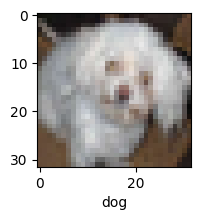

In [ ]:
example(xtest, ytest, 1000)

In [ ]:
classname[y_classes[1000]]

'dog'

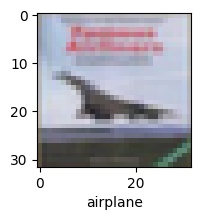

In [ ]:
example(xtest, ytest, 3)

In [ ]:
classname[y_classes[3]]

'ship'

In [ ]:
loss,acc= model.evaluate(xtest,ytest,verbose=False)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = cnn.predict(xtest)
y_pred_classes = [np.argmax(element) for element in y_pred]
print('classification report: \n', classification_report(ytest, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.73      0.72      0.72      1000
           1       0.79      0.84      0.81      1000
           2       0.66      0.54      0.60      1000
           3       0.49      0.50      0.49      1000
           4       0.66      0.60      0.63      1000
           5       0.57      0.63      0.60      1000
           6       0.82      0.69      0.75      1000
           7       0.66      0.80      0.72      1000
           8       0.78      0.81      0.79      1000
           9       0.76      0.79      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



Text(0.5, 1.0, 'Training and Test Performance Graph')

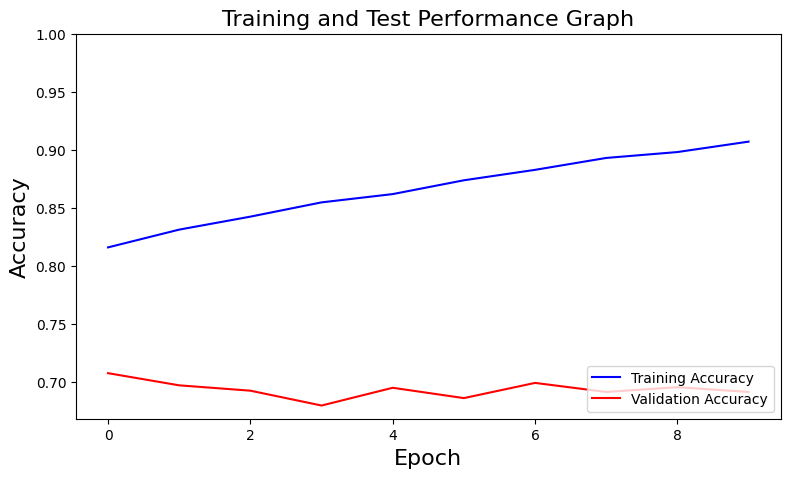

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],color = "b",label= "Training Accuracy")
plt.plot(history.history["val_accuracy"], color = "r", label = "Validation Accuracy")
plt.legend(loc = "lower right")
plt.xlabel("Epoch", fontsize= 16)
plt.ylabel("Accuracy",fontsize = 16)
plt.ylim([min(plt.ylim()),1])
plt.title("Training and Test Performance Graph", fontsize = 16)

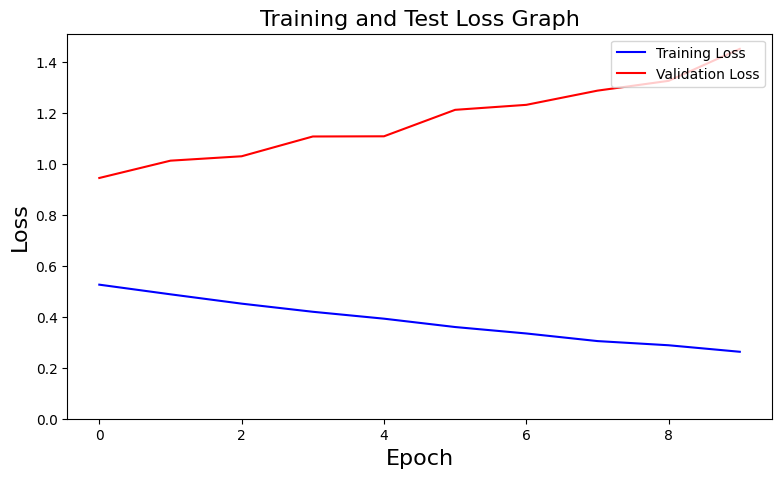

In [ ]:
plt.figure(figsize= (20,5))
plt.subplot(1,2,2)
plt.plot(history.history["loss"],color= "b",label="Training Loss")
plt.plot(history.history["val_loss"],color="r",label="Validation Loss")
plt.legend(loc= "upper right")
plt.xlabel("Epoch",fontsize=16)
plt.ylabel("Loss",fontsize = 16)
plt.ylim([0,max(plt.ylim())])
plt.title("Training and Test Loss Graph",fontsize= 16)
plt.show()